In [167]:

import kneed
import numpy as np
import pandas as pd
import sklearn.preprocessing
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn import cluster

input = pd.read_csv("Country-data.csv")
quantiled_input = input[input.gdpp < input.gdpp.quantile(0.9)]

In [168]:
no_country = quantiled_input.drop(["country"], axis=1)
scaler = sklearn.preprocessing.MinMaxScaler()
normalized_input = scaler.fit_transform(no_country)
normalized_input = pd.DataFrame(normalized_input, columns=no_country.columns,
                                   index=no_country.index)
for column in ['inflation', 'child_mort']:
    normalized_input[column] = normalized_input[column].apply(lambda x: 1 - x)

life_gdpp_health = normalized_input[["life_expec", "gdpp", "health"]]
life_gdpp_health


,life_expec,gdpp,health
0,0.483936,0.007746,0.458708
1,0.887550,0.092834,0.374489
2,0.891566,0.101734,0.179886
3,0.562249,0.079362,0.071954
4,0.897590,0.287931,0.331971
...,...,...,...
162,0.620482,0.065890,0.268193
163,0.869478,0.319204,0.240392
164,0.823293,0.025957,0.398201
165,0.710843,0.025957,0.262469


/tmp/ipykernel_25020/3525975847.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/tmp/ipykernel_25020/3525975847.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/tmp/ipykernel_25020/3525975847.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/tmp/ipykernel_25020/3525975847.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index'

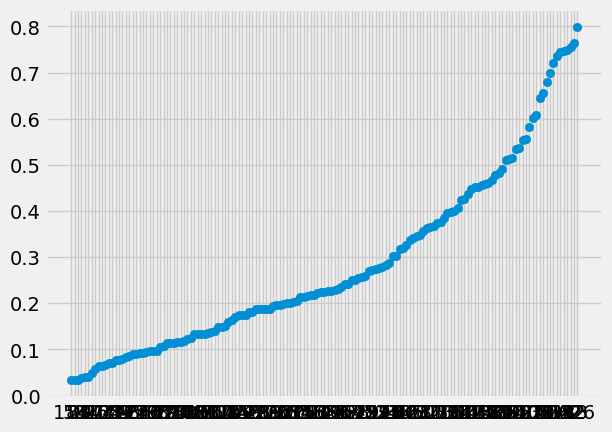

In [169]:

life_gdpp_sorted = life_gdpp_health.sort_values(by=["life_expec", "gdpp"])
distance_df = pd.DataFrame(columns=["index", "distance"])
for i in range(0, len(life_gdpp_sorted) - 1):
    dist = np.linalg.norm(life_gdpp_sorted.iloc[i] - life_gdpp_sorted.iloc[i + 1])
    distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
distance_df = distance_df.sort_values(by=["distance"])
plt.scatter(distance_df["index"], distance_df["distance"])
plt.show()

/tmp/ipykernel_25020/775918795.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/tmp/ipykernel_25020/775918795.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/tmp/ipykernel_25020/775918795.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
/tmp/ipykernel_25020/775918795.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distance_df = distance_df.append({'index': st

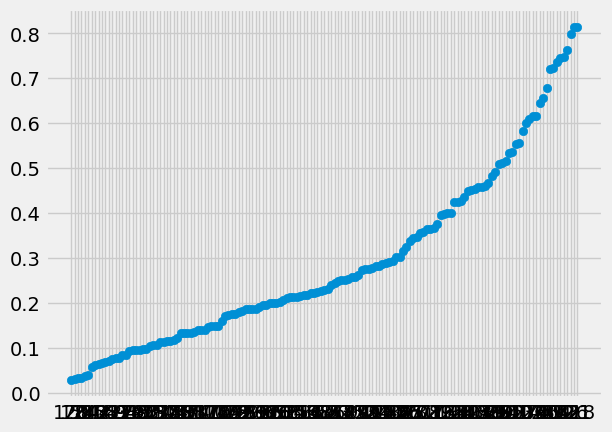

In [170]:
life_heath_sorted = life_gdpp_health.sort_values(by=["life_expec", "health"])
distance_df = pd.DataFrame(columns=["index", "distance"])
for i in range(0, len(life_heath_sorted) - 1):
    dist = np.linalg.norm(life_heath_sorted.iloc[i] - life_heath_sorted.iloc[i + 1])
    distance_df = distance_df.append({'index': str(i), 'distance': dist}, ignore_index=True)
distance_df = distance_df.sort_values(by=["distance"])
plt.scatter(distance_df["index"], distance_df["distance"])
plt.show()

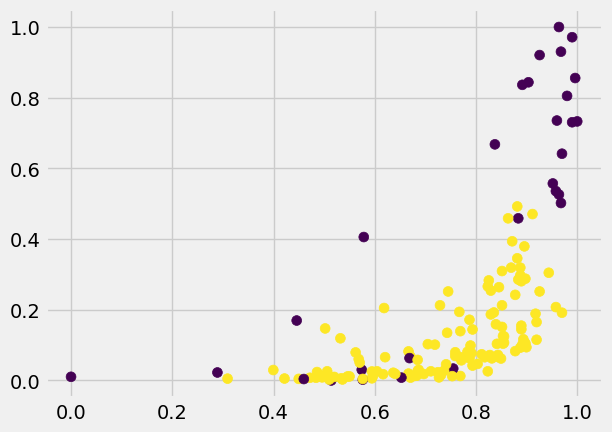

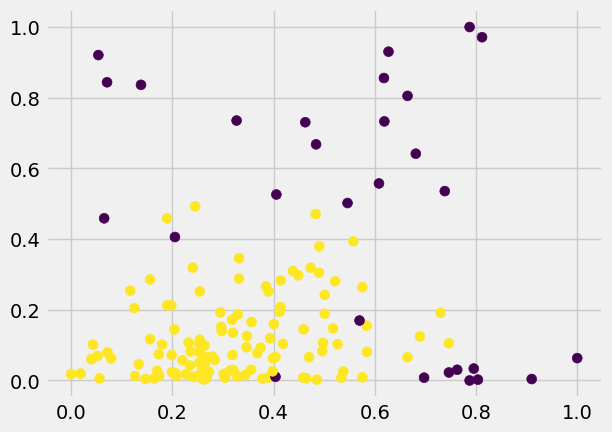

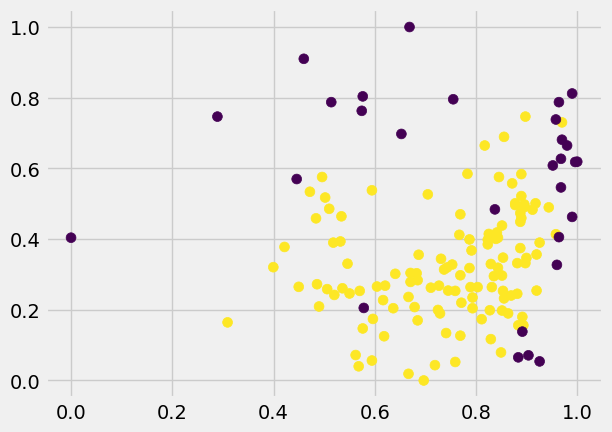

In [171]:
data_dbscan = sklearn.cluster.DBSCAN(eps=0.2, min_samples=20).fit_predict(life_gdpp_health)
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["gdpp"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["health"], life_gdpp_health["gdpp"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["health"], c=data_dbscan,
            s=50, cmap='viridis')
plt.show()

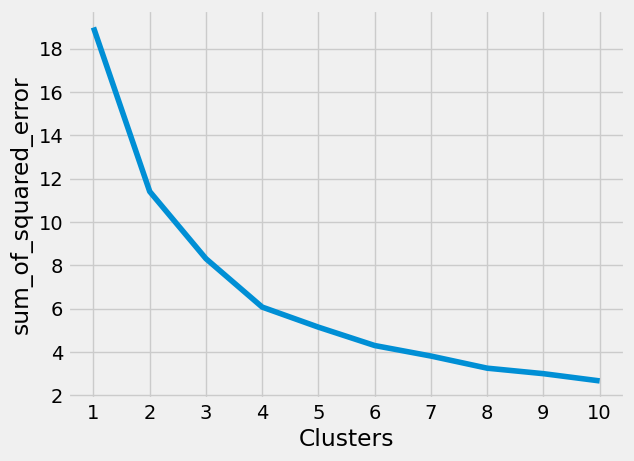

In [172]:

sum_of_squared_error = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, init="k-means++", n_init=8, max_iter=100, random_state=50)
    kmeans.fit(life_gdpp_health)
    sum_of_squared_error.append(kmeans.inertia_)

plt.plot(range(1, 11), sum_of_squared_error)
plt.xticks(range(1, 11))
plt.xlabel("Clusters")
plt.ylabel("sum_of_squared_error")
plt.show()

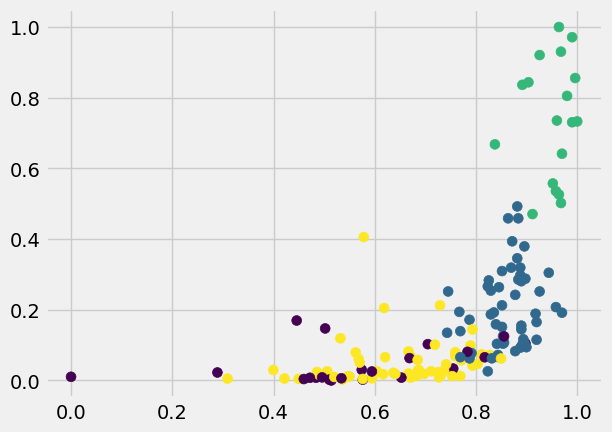

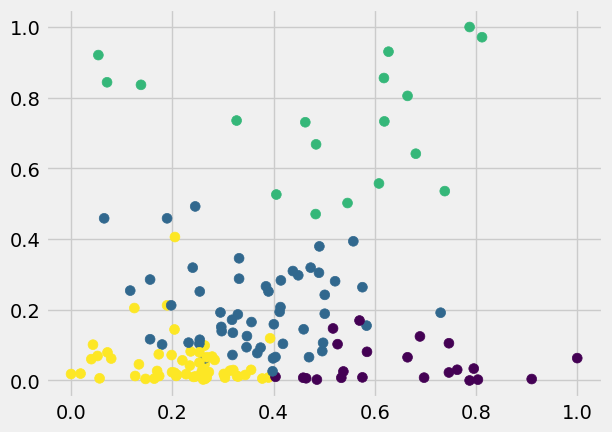

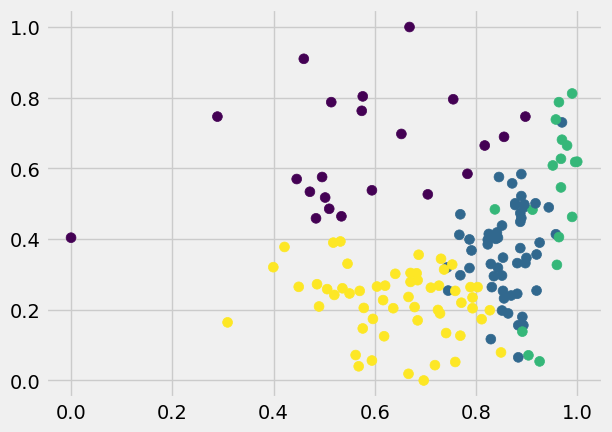

In [173]:
kl = kneed.KneeLocator(range(1, 11), sum_of_squared_error, curve="convex", direction="decreasing")
clusters_num = kl.elbow
clusters_num


gdp_kmeans_labels = cluster.KMeans(clusters_num).fit_predict(life_gdpp_health)
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["health"], life_gdpp_health["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["health"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')

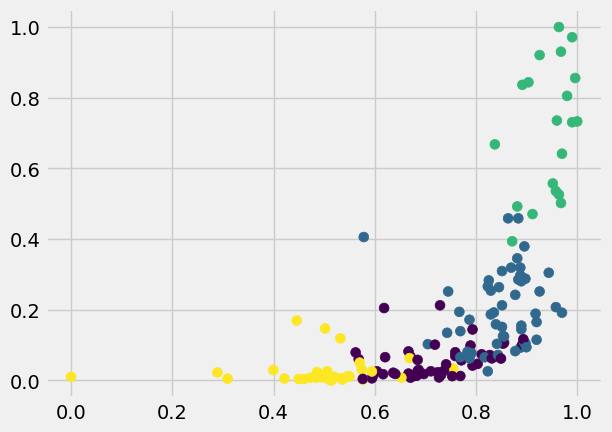

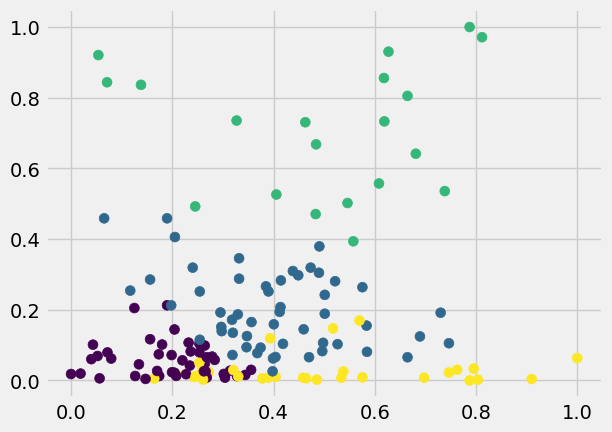

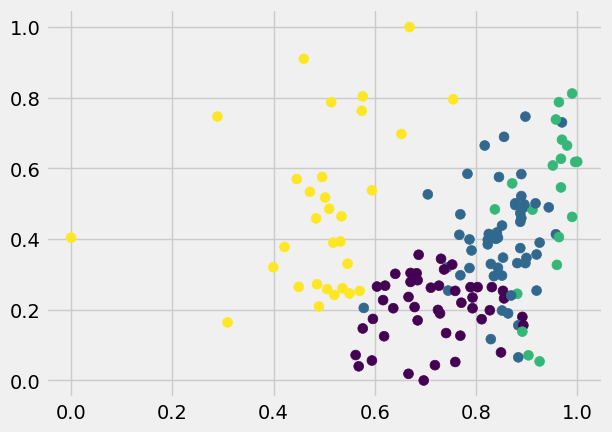

In [174]:
gdp_spectral_labels = cluster.SpectralClustering(n_clusters=clusters_num, affinity="nearest_neighbors",
                                                 assign_labels="kmeans").fit_predict(life_gdpp_health)

plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["gdpp"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["health"], life_gdpp_health["gdpp"], c=gdp_spectral_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["health"], c=gdp_spectral_labels,
            s=50, cmap='viridis')

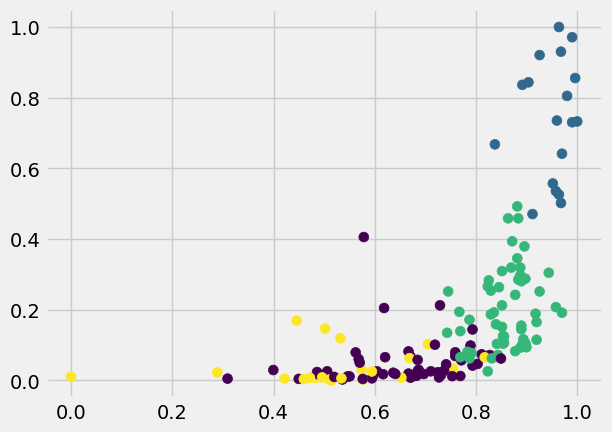

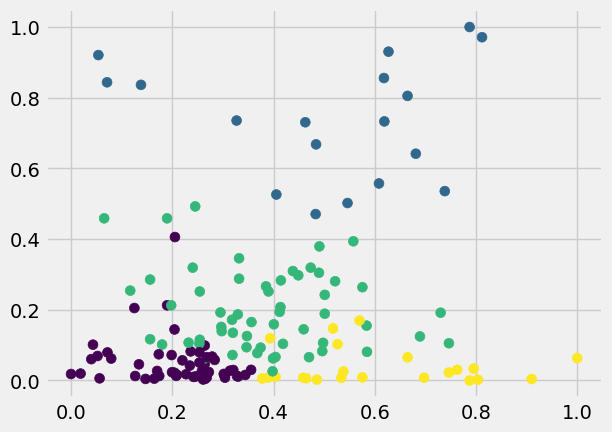

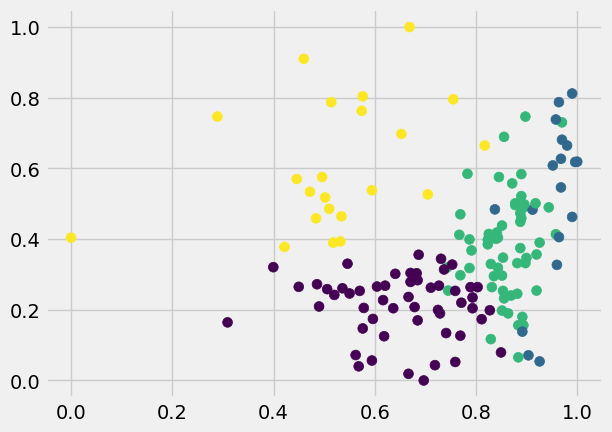

In [175]:
gdp_mini_kmeans_labels = cluster.MiniBatchKMeans(clusters_num).fit_predict(life_gdpp_health)

plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["gdpp"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["health"], life_gdpp_health["gdpp"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["health"], c=gdp_mini_kmeans_labels,
            s=50, cmap='viridis')

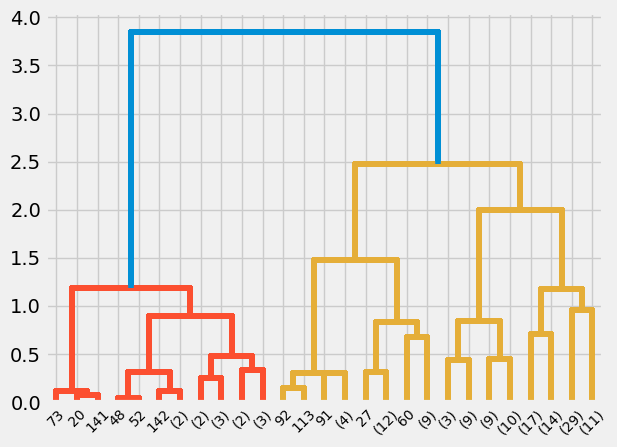

In [176]:
agglo_clustering = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(life_gdpp_health)
counts = np.zeros(agglo_clustering.children_.shape[0])
n_samples = len(agglo_clustering.labels_)
for i, merge in enumerate(agglo_clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [agglo_clustering.children_, agglo_clustering.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, truncate_mode="level", p=4)

plt.show()

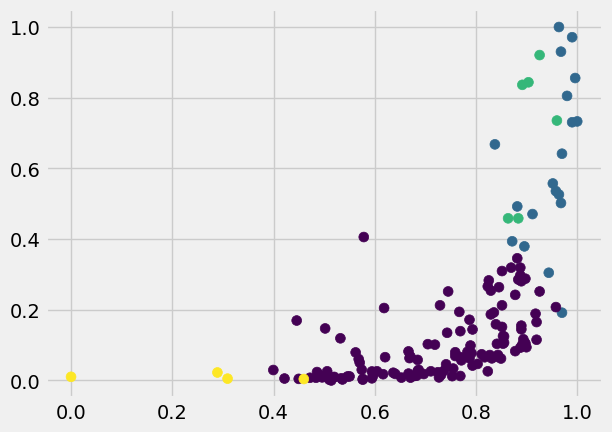

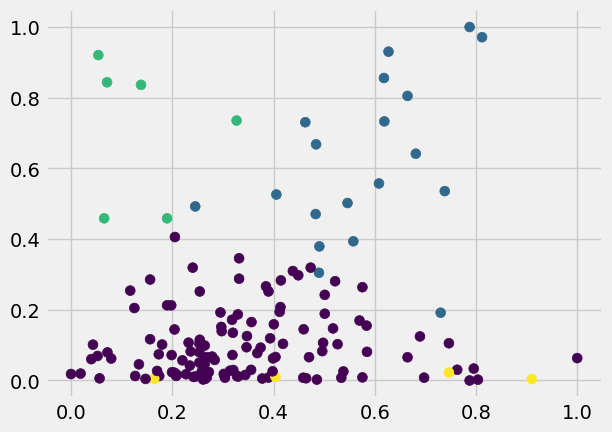

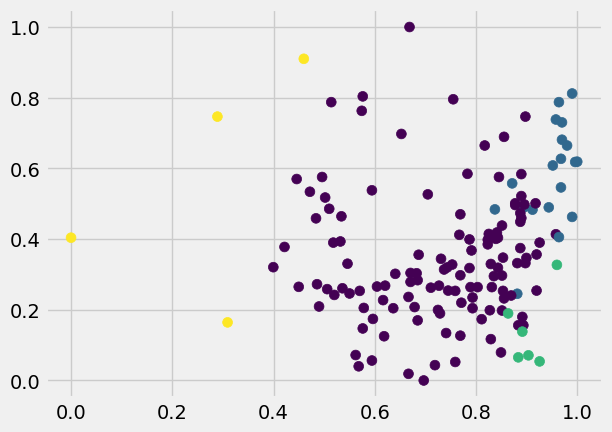

In [177]:

gdp_meanshift_labels = cluster.MeanShift().fit_predict(life_gdpp_health)
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["gdpp"], c=gdp_meanshift_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["health"], life_gdpp_health["gdpp"], c=gdp_meanshift_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(life_gdpp_health["life_expec"], life_gdpp_health["health"], c=gdp_meanshift_labels,
            s=50, cmap='viridis')

In [183]:

life_gdpp_health_with_cluster = life_gdpp_health.copy()
life_gdpp_health_with_cluster["cluster"] = gdp_meanshift_labels

coefs = np.array([3, 2, 4])

def score_row(row):
    return 1 / np.dot(row, coefs)


grouped_by_cluster = life_gdpp_health_with_cluster.groupby(["cluster"], as_index=False).mean()
grouped_by_cluster["score"] = grouped_by_cluster.apply(lambda row: score_row(row.drop("cluster").to_numpy()), axis=1)
grouped_by_cluster.sort_values(by=["score"])


life_gdpp_health_with_cluster["country"] = quantiled_input["country"]
life_gdpp_health_with_cluster[life_gdpp_health_with_cluster["cluster"] == 2]


,life_expec,gdpp,health,cluster,country
23,0.903614,0.843633,0.071137,2,Brunei
42,0.959839,0.735380,0.327065,2,Cyprus
82,0.925703,0.920614,0.053966,2,Kuwait
115,0.883534,0.458731,0.065413,2,Oman
128,0.863454,0.458731,0.189697,2,Saudi Arabia
157,0.891566,0.836417,0.138185,2,United Arab Emirates
